<a href="https://colab.research.google.com/github/AlvinaAnoop/SCT_ML_3/blob/main/SCT_ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm
import joblib
from sklearn.model_selection import GridSearchCV
import cv2
import seaborn as sns
import time
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from zipfile import ZipFile

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train_dir = "/content/drive/MyDrive/dogs-vs-cats/train"
test_dir = "/content/drive/MyDrive/dogs-vs-cats/test1"

In [3]:
# Initialize variables
image_size = (50, 50)
features = []
labels = []

In [6]:
# Process train images (dog = 1, cat = 0)
train_images = os.listdir(train_dir)
for image in tqdm(train_images, desc="Processing Train Images"):
    if image.startswith('cat'):
        label = 0
    else:
        label = 1
    image_read = cv2.imread(os.path.join(train_dir, image))
    image_resized = cv2.resize(image_read, image_size)
    image_normalized = image_resized / 255.0
    image_flatten = image_normalized.flatten()
    features.append(image_flatten)
    labels.append(label)

features = np.asarray(features)
labels = np.asarray(labels)

Processing Train Images: 100%|██████████| 25000/25000 [13:33<00:00, 30.73it/s] 


In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True, random_state=42)

In [8]:
# Free memory
del features
del labels

In [9]:
# Set up PCA and SVM in a pipeline
pca = PCA()
svm = SVC()

pipeline = Pipeline([
    ('pca', pca),
    ('svm', svm)
])

In [10]:
# Define parameter grid for grid search
param_grid = {
    'pca__n_components': [2, 1, 0.9, 0.8],
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
}

In [11]:
# Measure training time
start_time = time.time()

In [12]:
# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=4)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END pca__n_components=2, svm__kernel=linear;, score=0.531 total time=  32.1s
[CV 2/3] END pca__n_components=2, svm__kernel=linear;, score=0.532 total time=  32.8s
[CV 3/3] END pca__n_components=2, svm__kernel=linear;, score=0.536 total time=  30.7s
[CV 1/3] END pca__n_components=2, svm__kernel=rbf;, score=0.568 total time=  18.9s
[CV 2/3] END pca__n_components=2, svm__kernel=rbf;, score=0.567 total time=  20.1s
[CV 3/3] END pca__n_components=2, svm__kernel=rbf;, score=0.572 total time=  20.1s
[CV 1/3] END pca__n_components=2, svm__kernel=poly;, score=0.547 total time=  17.2s
[CV 2/3] END pca__n_components=2, svm__kernel=poly;, score=0.541 total time=  17.7s
[CV 3/3] END pca__n_components=2, svm__kernel=poly;, score=0.488 total time=  19.2s
[CV 1/3] END pca__n_components=2, svm__kernel=sigmoid;, score=0.503 total time=  18.0s
[CV 2/3] END pca__n_components=2, svm__kernel=sigmoid;, score=0.505 total time=  18.4s
[CV 3/

GridSearchCV(cv=3, estimator=Pipeline(steps=[('pca', PCA()), ('svm', SVC())]),
             param_grid={'pca__n_components': [2, 1, 0.9, 0.8],
                         'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=4)

In [13]:
# End time for training
end_time = time.time()
print(f"Training Time: {end_time - start_time:.2f} seconds")

Training Time: 23860.94 seconds


In [14]:
# Get best model and parameters
best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'pca__n_components': 0.9, 'svm__kernel': 'rbf'}
Best Score:  0.6746001358797947


In [15]:
# Evaluate on test dataset
accuracy = best_pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6728


In [16]:
# Make predictions
y_pred = best_pipeline.predict(X_test)

In [17]:
# Classification report
target_names = ['Cat', 'Dog']
classification_rep = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

         Cat       0.67      0.68      0.68      2523
         Dog       0.67      0.66      0.67      2477

    accuracy                           0.67      5000
   macro avg       0.67      0.67      0.67      5000
weighted avg       0.67      0.67      0.67      5000



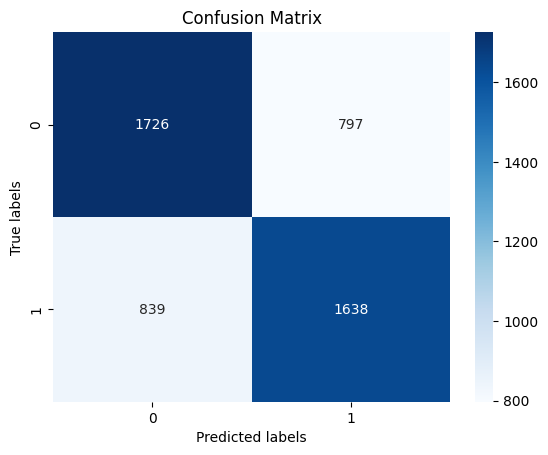

In [18]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()